In [1]:
import pandas as pd
import xgboost as xgb

In [3]:
df = pd.read_csv(r"range12-02.csv", index_col=[0], parse_dates=[0])

In [4]:
target_variable = '1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U'

In [5]:
df.shape

(20455, 1961)

In [6]:
df.sort_index(axis=0, ascending=True, inplace=True)

In [7]:
df
df.shape

(20455, 1961)

<Axes: xlabel='Time'>

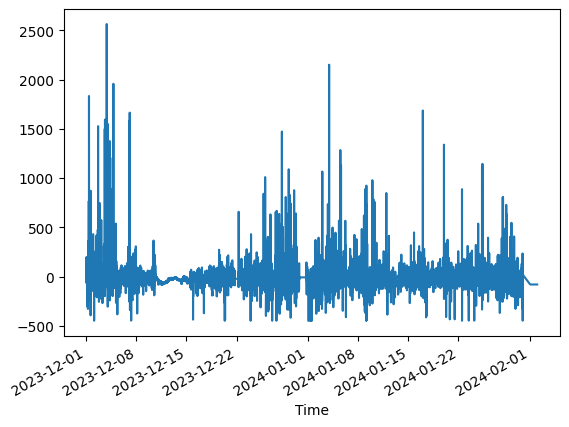

In [8]:
begin_date = '01-Dec-2023'
end_date = '02-Feb-2024'

overpressure_1 = df[target_variable]
overpressure_1.loc[(overpressure_1.index > begin_date) & (overpressure_1.index <= end_date)].plot()

<Axes: xlabel='Time'>

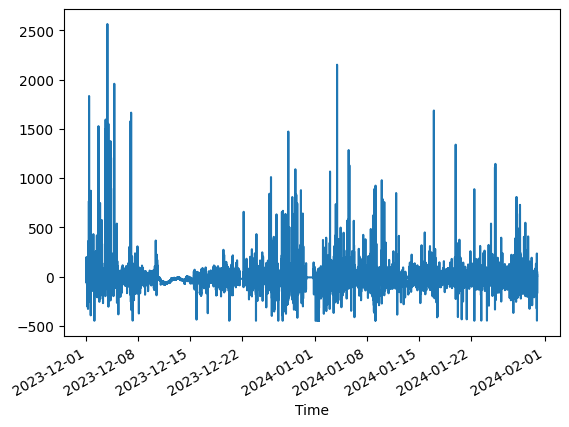

In [9]:
split_date = '01-Feb-2024'

df = df.loc[df.index <= split_date].copy()
df[target_variable].plot()

In [10]:
df.tail(50)

,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD101_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD102_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD103_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD104_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD105_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD106_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_2.DD201_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_2.DD202_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_2.DD203_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_2.DD204_Weight,...,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/CurrentControl.QMAN_AUT,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/CurrentControl.SP,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.LMN,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.PV_IN,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.QLMN_HLM,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.QLMN_LLM,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.QMAN_AUT,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.SP,1023-119-201-PULO-0001-SER_SAF1MHS_34/H_ZB002_YGM01/BstFanCntDmp_POS.POS_MON,1023-119-201-PULO-0001-SER_SAF1MHS_34/H_ZB003_YGM01/BstFanShtDmp_POS.POS_MON
Time,,,,,,,,,,,,,,,,,,,,,
2024-01-30 19:55:01,2.718750,5.824219,1.140625,238.667969,13.371094,2.014648,13.272461,-6.644531,2050.224609,2164.748047,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-01-30 20:00:01,188.964844,-4.651367,3127.691406,2164.257812,368.635742,897.712891,227.958984,-14.103516,2966.935547,2470.376953,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-01-30 20:05:01,231.404297,-14.467773,1754.638672,2526.343750,419.674805,1024.920898,3.008789,-1.693359,713.980469,983.279297,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-01-30 20:10:01,13.963867,4.157227,1654.525391,2112.607422,284.144531,654.969727,228.153320,-13.036133,3007.828125,3013.994141,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-01-30 20:15:01,233.230469,-13.987305,1686.701172,2970.251953,378.444336,1089.015625,19.813477,-0.804688,123.855469,108.611328,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-01-30 20:20:01,-42.218750,14.588867,290.746094,703.462891,112.989258,198.256836,66.608398,-7.295898,2361.396484,2558.511719,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-01-30 20:25:01,-49.051758,0.608398,15.712891,0.554688,3.377930,-15.654297,173.050781,-6.893555,1331.503906,1420.570312,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-01-30 20:30:01,-49.023438,0.234375,13.113281,-10.744141,1.531250,-17.959961,0.566406,-3.789062,1308.781250,1380.488281,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-01-30 20:35:01,58.969727,-1.671875,138.755859,105.400391,34.951172,66.932617,226.527344,-13.251953,3008.935547,3088.011719,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN


In [11]:
features_list = list(df.columns)

In [12]:
correlation_matrix = df.corr()

In [13]:
target_correlations = correlation_matrix[target_variable]
sorted_correlations = target_correlations.abs().sort_values(ascending=False)
top_100_correlations = sorted_correlations.head(50)
df.shape

(17574, 1961)

In [14]:
# top_100_correlations
top_100_features = top_100_correlations.index.tolist()
top_100_features

['1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U',
 '1023-115-201-GAZO-0001-GCP1/G_BB02_PIA01/FurPrsCntrl.U',
 '1023-115-201-GAZO-0001-GCP1/G_BB02_PIA02/FurPrsCntrl.U',
 '1023-113-201-PECH-0001-SAF1_FUR/I_XC014_TIA020/STmpAr37SrtLvl14.U',
 '1023-115-201-GAZO-0001-GCP1/G_KR02_YGL01/ClnGasControl2.LMN',
 '1023-115-201-GAZO-0001-GCP1/G_KR02_YGL01/PosCgCtrlVlv2Out.U',
 '1023-115-201-GAZO-0001-GCP1/G_KR01_YGL01/ClnGasControl1.LMN',
 '1023-115-201-GAZO-0001-GCP1/G_KR01_YGL01/PosCgCtrlVlv.U',
 '1023-113-201-PECH-0001-SAF1_FUR/Analysis/GasAnalisisCal4.U',
 '1023-115-201-GAZO-0001-GCP1/Analysis/SAF_GasAnalysis.ActualVal_R2',
 '1023-113-201-PECH-0001-SAF1_FUR/I_XC014_TIA019/STmpAr37LngLvl14.U',
 '1023-115-201-GAZO-0001-GCP1/Analysis/SAF_GasAnalysis.ActualVal_N2',
 '1023-113-201-PECH-0001-SAF1_FUR/Analysis/GasAnalisisCal3.U',
 '1023-113-201-PECH-0001-SAF1_FUR/I_KB006_MKL01/Bin6Drive1.PV',
 '1023-115-201-GAZO-0001-GCP1/G_NE01_AI08/GasAnaH2Conc.U',
 '1023-115-201-GAZO-0001-GCP1/G_ZD02_T

In [15]:
df.shape

(17574, 1961)

In [16]:
df = df[top_100_features]

In [17]:
df
df.shape

(17574, 50)

In [20]:
# df_final = remove_orig_features(df, top_100_features[1:])
# df_final.head
df.tail

<bound method NDFrame.tail of                      1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U  \
Time                                                                              
2023-12-01 00:00:01                                         -36.694695            
2023-12-01 00:05:01                                          -3.461731            
2023-12-01 00:10:01                                           8.097565            
2023-12-01 00:15:01                                           8.097565            
2023-12-01 00:20:01                                           8.097565            
...                                                                ...            
2024-01-30 23:40:01                                          12.432297            
2024-01-30 23:45:01                                          51.444912            
2024-01-30 23:50:01                                        -169.626556            
2024-01-30 23:55:01                                      

In [21]:
import pandas as pd
import matplotlib as mpl
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # Use GPU 0
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
# Initialize the scaler
nam_col = df.columns
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
data_scaled = scaler.fit_transform(df)

# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(data_scaled, columns = nam_col)

# Display the first few rows of the scaled DataFrame
df_scaled.head()

,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA01/FurPrsCntrl.U,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA02/FurPrsCntrl.U,1023-113-201-PECH-0001-SAF1_FUR/I_XC014_TIA020/STmpAr37SrtLvl14.U,1023-115-201-GAZO-0001-GCP1/G_KR02_YGL01/ClnGasControl2.LMN,1023-115-201-GAZO-0001-GCP1/G_KR02_YGL01/PosCgCtrlVlv2Out.U,1023-115-201-GAZO-0001-GCP1/G_KR01_YGL01/ClnGasControl1.LMN,1023-115-201-GAZO-0001-GCP1/G_KR01_YGL01/PosCgCtrlVlv.U,1023-113-201-PECH-0001-SAF1_FUR/Analysis/GasAnalisisCal4.U,1023-115-201-GAZO-0001-GCP1/Analysis/SAF_GasAnalysis.ActualVal_R2,...,1023-113-201-PECH-0001-SAF1_FUR/I_KB005_MKL02/Bin5Drive2.PV,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssSBin3.SpKgPerMin,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin3Inn,1023-113-201-PECH-0001-SAF1/HMI_03_EcCtr.EcPosActVal,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssSBin3.Sp_Kg_ShortInterval,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.Bin7InnDistr,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssSBin8.Sp_Kg_ShortInterval,1023-118-204-OHLU-0001-SAF1_FUR/I_HC002_TIA002/TmpMeasOutReac.U,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssSBin8.SpKgPerMin,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn
0,0.136625,0.453111,0.456613,0.425660,0.000000,0.000079,0.487450,0.498349,0.157807,0.168640,...,0.499969,0.450973,0.450973,0.598209,0.446455,0.48,0.500520,0.820106,0.506169,0.506169
1,0.147651,0.485318,0.488265,0.466427,0.116296,0.100484,0.679426,0.673169,0.179645,0.205292,...,0.499969,0.447312,0.447312,0.509233,0.446911,0.48,0.499912,0.822751,0.502059,0.502059
2,0.151486,0.484833,0.487849,0.396882,0.000000,0.000000,0.465793,0.444764,0.147479,0.170482,...,0.499969,0.450414,0.450414,0.545048,0.449114,0.48,0.501758,0.825397,0.505542,0.505542
3,0.151486,0.492841,0.495580,0.416067,0.000000,0.000000,0.472973,0.441578,0.157262,0.177757,...,0.499969,0.450832,0.450832,0.577504,0.448585,0.48,0.502711,0.806878,0.506011,0.506011
4,0.151486,0.508407,0.511700,0.441247,0.015942,0.000000,0.595058,0.577851,0.175105,0.200623,...,0.499969,0.448511,0.448511,0.591494,0.447190,0.48,0.500208,0.785714,0.503406,0.503406


# Remove test day

In [22]:
window_size = 10000

df_train = df_scaled.iloc[:-window_size].copy()  # All rows except the last 120
df_test = df_scaled.iloc[-window_size:].copy()  # Last 120 rows
df_train.head

<bound method NDFrame.head of       1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U  \
0                                              0.136625            
1                                              0.147651            
2                                              0.151486            
3                                              0.151486            
4                                              0.151486            
...                                                 ...            
7569                                           0.149089            
7570                                           0.157239            
7571                                           0.124161            
7572                                           0.150527            
7573                                           0.139022            

      1023-115-201-GAZO-0001-GCP1/G_BB02_PIA01/FurPrsCntrl.U  \
0                                              0.453111        
1                        

# Train data visualization

<Axes: >

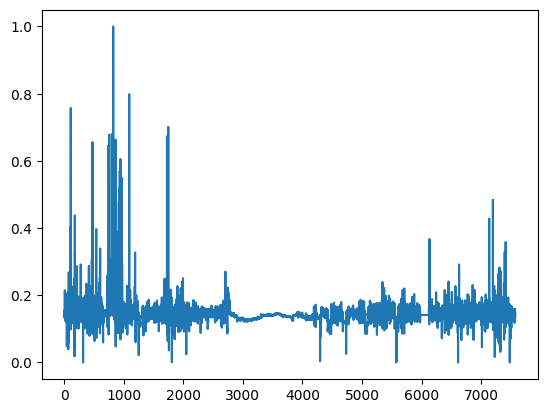

In [23]:
df_train[target_variable].plot()

# Test data visualization

<Axes: >

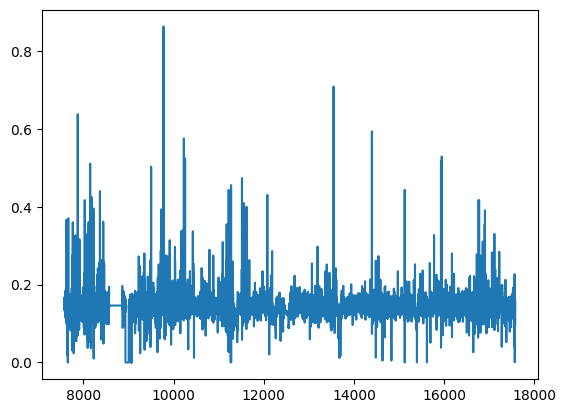

In [24]:
df_test[target_variable].plot()

In [25]:
def data_preparation(df_base):
    df_base.fillna(0, inplace=True)
    X = df_base.drop(columns=[target_variable])
    y = df_base[target_variable]
    
    return X, y

In [26]:
x_train, y_train = data_preparation(df_train)
x_test, y_test = data_preparation(df_test)
x_train.shape


(7574, 49)

In [27]:
# Parameters
win_length = 12*10
batch_size = 32
num_features = 49

# Create TimeSeriesGenerator
train_generator = TimeseriesGenerator(x_train.values, y_train.values, length=win_length, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test.values, y_test.values, length=win_length, batch_size=batch_size)

## import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(win_length, num_features), return_sequences=True),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)  # Output layer predicting two targets
])

# Compile the model
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.MeanAbsoluteError()])

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')

# Fit the model
history = model.fit(train_generator, epochs=40, validation_data=test_generator, shuffle=False, callbacks=[early_stopping])


Epoch 1/40
233/233 [==============================] - 53s 51ms/step - loss: 0.0036 - mean_absolute_error: 0.0346 - val_loss: 0.0011 - val_mean_absolute_error: 0.0176
Epoch 2/40
233/233 [==============================] - 11s 48ms/step - loss: 0.0016 - mean_absolute_error: 0.0238 - val_loss: 0.0011 - val_mean_absolute_error: 0.0173
Epoch 3/40
233/233 [==============================] - 11s 45ms/step - loss: 0.0015 - mean_absolute_error: 0.0226 - val_loss: 0.0011 - val_mean_absolute_error: 0.0173
Epoch 4/40
233/233 [==============================] - 11s 48ms/step - loss: 0.0015 - mean_absolute_error: 0.0219 - val_loss: 0.0011 - val_mean_absolute_error: 0.0173
Epoch 5/40
233/233 [==============================] - 12s 50ms/step - loss: 0.0015 - mean_absolute_error: 0.0213 - val_loss: 0.0011 - val_mean_absolute_error: 0.0172
Epoch 6/40
233/233 [==============================] - 11s 48ms/step - loss: 0.0014 - mean_absolute_error: 0.0209 - val_loss: 0.0011 - val_mean_absolute_error: 0.0175
Epoc

309/309 [==============================] - 4s 14ms/step


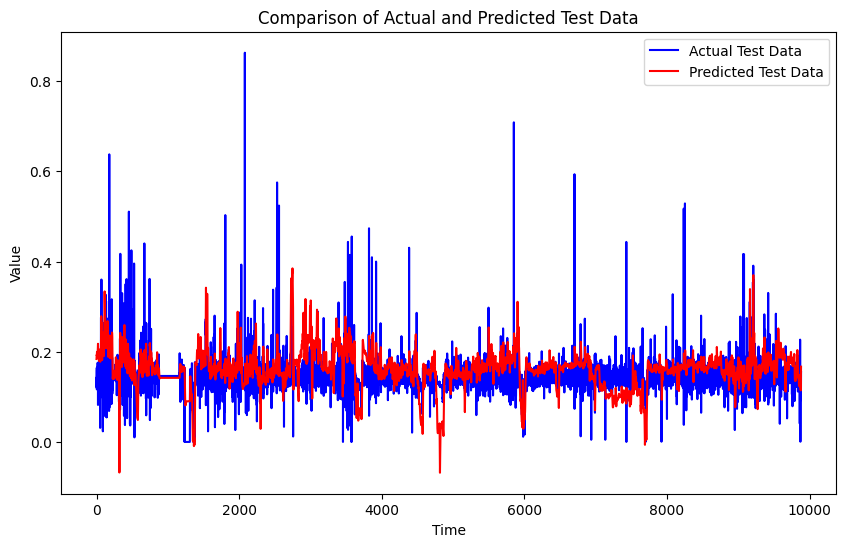

In [36]:
# Generate predictions for the test data
predictions = model.predict(test_generator)

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[win_length:], label='Actual Test Data', color='blue')
plt.plot(predictions*10-1.33, label='Predicted Test Data', color='red')
plt.title('Comparison of Actual and Predicted Test Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
